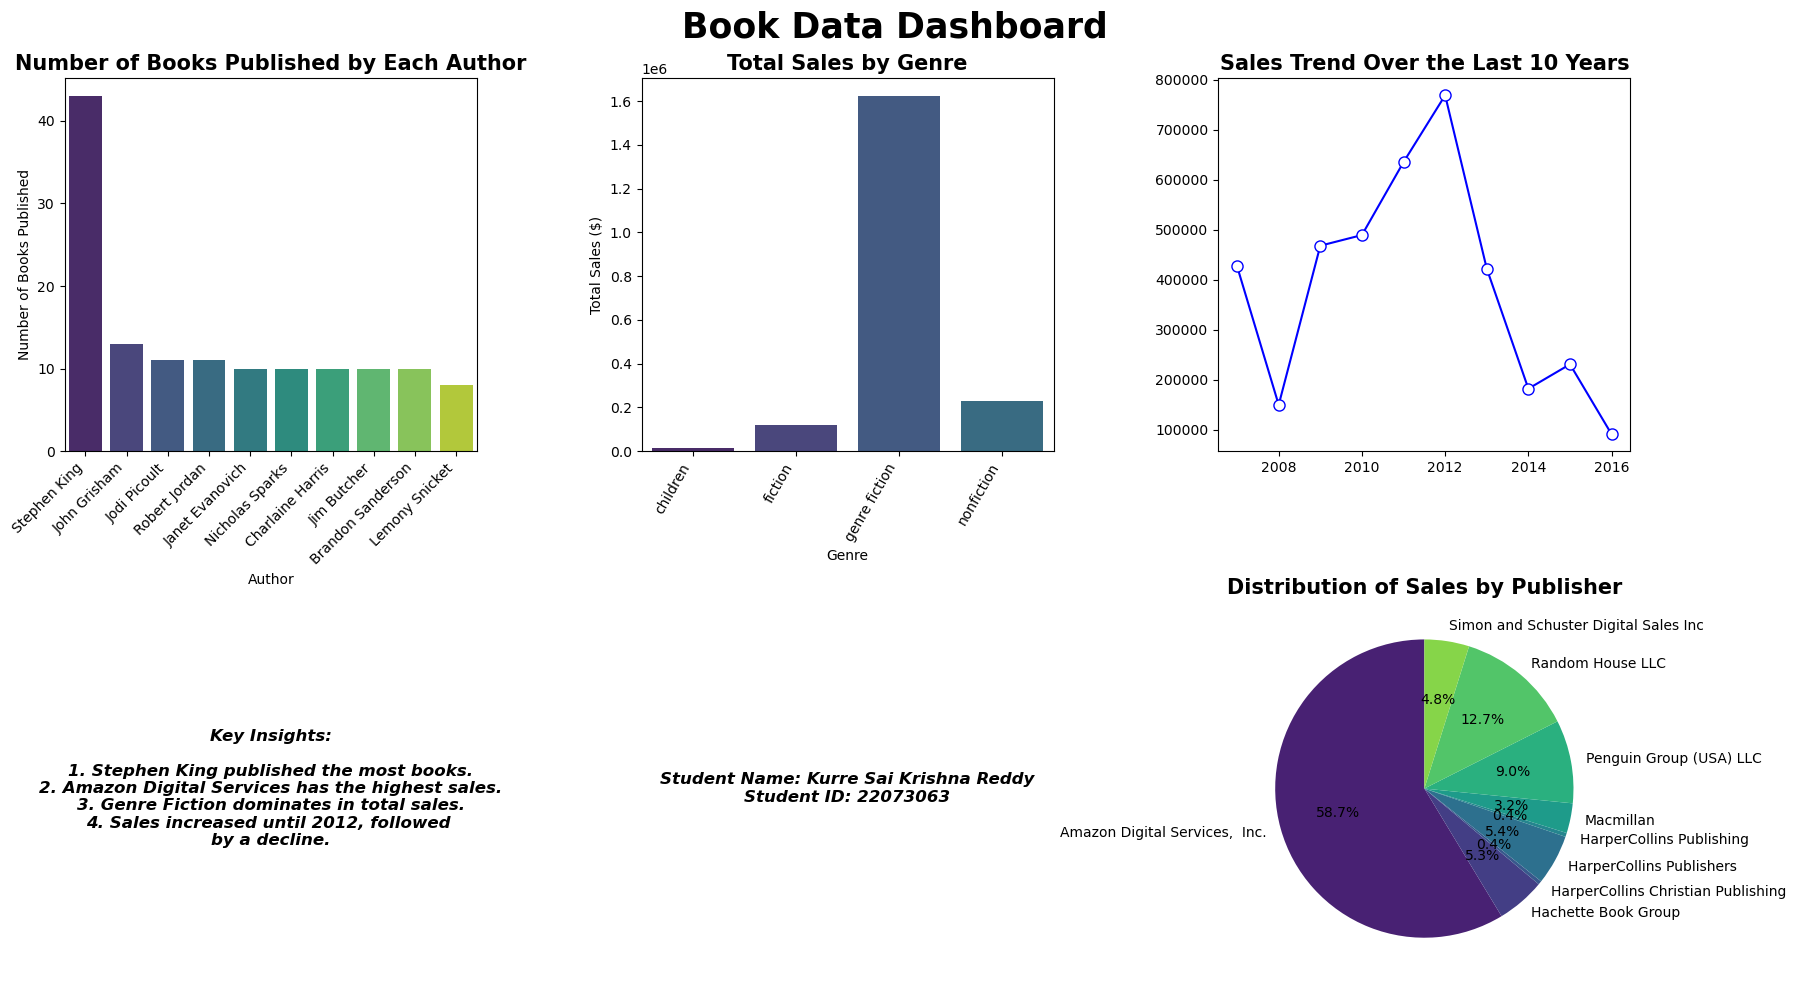

In [1]:
#DataSourcelink : https://www.kaggle.com/code/wildanmujjahid/books-sales-analytics/input
#GithubLink : https://github.com/Krish1926/infographics.git

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Load and preprocess data
data = pd.read_csv('Books_Data_Clean.csv')
data['Author'] = data['Author'].apply(lambda x: [author.strip() for author in x.split(',')])

# Extract authors and their book counts
all_authors = [author for sublist in data['Author'] for author in sublist]
author_counts = pd.Series(all_authors).value_counts().head(10)

# Define a custom color palette
custom_palette = sns.color_palette("viridis" , len(author_counts))

# Create a 2x3 grid
fig = plt.figure(figsize=(18 , 10))
grid = GridSpec(2 , 3 , width_ratios=[1 , 1 , 1] , height_ratios=[1 , 1])

# Plot 1: Number of Books Published by Each Author
plt.subplot(grid[0 , 0])
sns.barplot(x=author_counts.index , y=author_counts.values , palette=custom_palette)
plt.title('Number of Books Published by Each Author' , fontweight='bold',fontsize=15)
plt.xlabel('Author')
plt.ylabel('Number of Books Published')
plt.xticks(rotation=45 , ha='right')

# Analyze publisher sales
publisher_sales = data.groupby('Publisher ')['units sold'].sum()
highest_sales_publisher = publisher_sales.idxmax()

# Plot 2: Distribution of Sales by Publisher
plt.subplot(grid[1 , 2])
plt.pie(publisher_sales , labels=publisher_sales.index , autopct='%1.1f%%' ,
        startangle=90 , colors=custom_palette)
plt.title('Distribution of Sales by Publisher' , fontweight='bold',fontsize=15)

# Analyze genre sales
genre_sales = data.groupby('genre')['gross sales'].sum().reset_index()
highest_sales_genre = genre_sales.loc[genre_sales['gross sales'].idxmax()]

# Plot 3: Total Sales by Genre
plt.subplot(grid[0 , 1])
sns.barplot(x='genre' , y='gross sales' , data=genre_sales , palette=custom_palette)
plt.title('Total Sales by Genre' , fontweight='bold',fontsize=15)
plt.xlabel('Genre')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=60 , ha='right')  # Adjust rotation to 60 degrees

# Analyze sales trend over the last 10 years
sales = data[['Publishing Year' , 'units sold']]
sales = sales[data['Publishing Year'] >= 0]
sales_trend = sales.groupby('Publishing Year')['units sold'].sum().\
    reset_index().sort_values(
    by='Publishing Year' , ascending=False).head(10)

# Plot 4: Sales Trend Over the Last 10 Years
plt.subplot(grid[0 , 2])
plt.plot(sales_trend['Publishing Year'] , sales_trend['units sold'] ,
         marker='o' , color='blue' ,
         markerfacecolor='white' , markersize=8)
plt.title('Sales Trend Over the Last 10 Years' , fontweight='bold',fontsize=15)

# Add a subplot for key insights
plt.subplot(grid[1 , 0])
text = "Key Insights:\n\n" \
       "1. Stephen King published the most books.\n" \
       "2. Amazon Digital Services has the highest sales.\n" \
       "3. Genre Fiction dominates in total sales.\n" \
       "4. Sales increased until 2012, followed \n" \
       "by a decline."
plt.text(0.5 , 0.5 , text , ha='center' , va='center' , fontsize=12 ,
         color='black' , fontstyle='italic' , fontweight='bold')
plt.axis('off')

# Add student information
plt.subplot(grid[1 , 1])
text = "Student Name: Kurre Sai Krishna Reddy\n" \
       "Student ID: 22073063"
plt.text(0.5 , 0.5 , text , ha='center' , va='center' , fontsize=12 , color='black' ,
         fontstyle='italic' , fontweight='bold')
plt.axis('off')

# Main title for the entire dashboard
fig.suptitle('Book Data Dashboard' , fontsize=25 , fontweight='bold')

# Save and display the dashboard
# plt.savefig('22073063.png' , dpi=300)
plt.tight_layout()
plt.show()
